# EDA + SNA Implementation

In [259]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import time as time
import pickle
#For Loading intermediate libraries
def save_obj(obj, name ):
    with open(r"D:\working repos\SNA\Pickle_Loads\ "+ str(name) + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(r"D:\working repos\SNA\Pickle_Loads\ "+ str(name) + '.pkl', 'rb') as f:
        return pickle.load(f)
import warnings
warnings.filterwarnings('ignore')

In [260]:
try:
    new = pd.read_csv(r'C:\Users\Akhil Sanker\Downloads\Compressed\BindingDB_All.tsv',sep='\t',chunksize=50,usecols=['PubChem CID','Target Name Assigned by Curator or DataSource','Ki (nM)','IC50 (nM)','Kd (nM)'])
except Exception as e:
    print(e)

In [ ]:
var=1
for i in range(10):
    if i==0:
        var=1
    else:
        pass
    try:

        for df in new:
            df.to_csv('file.csv', sep=',', mode='a')
    except:
        print("Error : "+str(var))
        var+=1
        pass

In [ ]:
for i in range(10):
    try:
        file1 =  pd.read_csv("file.csv")
    except Exception as e:
        print(e)

**PART WORKING FILE** - EDA

In [375]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import time as time

In [376]:
file1 = pd.read_csv('temp_work_file_new.csv')

In [377]:
temp_work_file_new = file1[['PubChem CID','Target Name Assigned by Curator or DataSource','Ki (nM)','IC50 (nM)','Kd (nM)']]

In [378]:
'''temp_work_file_new.to_csv("temp_work_file_new.csv")'''

'temp_work_file_new.to_csv("temp_work_file_new.csv")'

In [379]:
tmp_wrk = temp_work_file_new.loc[temp_work_file_new['PubChem CID']!='PubChem CID']

In [380]:
tmp_wrk.drop_duplicates(inplace=True)
tmp_wrk.drop_duplicates(subset='PubChem CID',inplace=True)
tmp_wrk.dropna(subset=['PubChem CID'],inplace=True)

In [381]:
tdf_a = tmp_wrk[['PubChem CID','Target Name Assigned by Curator or DataSource']]
tdf_b = tmp_wrk[['Ki (nM)','IC50 (nM)','Kd (nM)']]
tdf_b.fillna('99999',inplace=True)

In [382]:
tb_list_1 = tdf_b['Ki (nM)']
tb_list_2 = tdf_b['IC50 (nM)']
tb_list_3 = tdf_b['Kd (nM)']
ki_list = []
ic_list = []
kd_list = []
for x in tb_list_1:
    if '<' in x or '>' in x or '#' in x:
        x=str(float(x[1:])+0.5)
        
    ki_list.append(x)
for y in tb_list_2:
    if '<' in y or '>' in y or '#' in y:
        y=str(float(y[1:])+0.5)
        
    ic_list.append(y)
for z in tb_list_3:
    if '<' in z or '>' in z or '#' in z:
        z=str(float(z[1:])+0.5)
        
    kd_list.append(z)

#Number issue sortedd..Converted all to numbers.

In [383]:
tb_final = pd.DataFrame()
tb_final['Ki (nM)'] = ki_list
tb_final['IC50 (nM)'] = ic_list
tb_final['Kd (nM)'] = kd_list
tdf_a.reset_index(inplace=True)
tdf_new = pd.concat([tdf_a ,tb_final],axis=1)
try:
    tdf_new.drop('index',axis=1 ,inplace=True)
except:
    pass
out_df = tdf_new.loc[(tdf_new['Ki (nM)']=='99999') &(tdf_new['Kd (nM)']=='99999') & (tdf_new['IC50 (nM)']=='99999')]
part_cleaned = pd.concat([tdf_new,out_df,out_df]).drop_duplicates(keep=False)
part_cleaned['min'] = part_cleaned[['Ki (nM)','IC50 (nM)','Kd (nM)']].min(axis=1)
part_cleaned #Cleaned number issue,.. removed 3==nan , added minimum.

,PubChem CID,Target Name Assigned by Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),min
0,3081361,HIV-1 Protease,0.24,99999,99999,0.24
1,5327236,HIV-1 Protease,0.25,99999,99999,0.25
2,5327235,HIV-1 Protease,0.41,99999,99999,0.41
3,5327234,HIV-1 Protease,0.8,99999,99999,0.80
4,3009319,HIV-1 Protease,0.99,99999,99999,0.99
...,...,...,...,...,...,...
790549,76318239,Acetylcholinesterase,99999,39110,99999,39110.00
790550,76336413,Acetylcholinesterase,99999,50000.5,99999,50000.50
790551,76321936,Acetylcholinesterase,99999,180,99999,180.00
790552,76329133,Acetylcholinesterase,99999,50830,99999,50830.00


In [384]:
'''Note : - The mixture(Hiv-acronym is an example) is not cleaned, Still Proceeding with the available data '''

'Note : - The mixture(Hiv-acronym is an example) is not cleaned, Still Proceeding with the available data '

In [385]:
cid_target_dict  = part_cleaned.groupby('PubChem CID')['Target Name Assigned by Curator or DataSource'].apply(list).to_dict()

In [386]:
len(cid_target_dict.keys())
#Dictionary of unique key-value pairs of compounds and their targets


710157

In [387]:
'''
CHECKING FOR NAN

import math
math.isnan(tmp_wrk['Kd (nM)'][0])'''

"\nCHECKING FOR NAN\n\nimport math\nmath.isnan(tmp_wrk['Kd (nM)'][0])"

In [388]:
part_cleaned

,PubChem CID,Target Name Assigned by Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),min
0,3081361,HIV-1 Protease,0.24,99999,99999,0.24
1,5327236,HIV-1 Protease,0.25,99999,99999,0.25
2,5327235,HIV-1 Protease,0.41,99999,99999,0.41
3,5327234,HIV-1 Protease,0.8,99999,99999,0.80
4,3009319,HIV-1 Protease,0.99,99999,99999,0.99
...,...,...,...,...,...,...
790549,76318239,Acetylcholinesterase,99999,39110,99999,39110.00
790550,76336413,Acetylcholinesterase,99999,50000.5,99999,50000.50
790551,76321936,Acetylcholinesterase,99999,180,99999,180.00
790552,76329133,Acetylcholinesterase,99999,50830,99999,50830.00


**Removing and creating a new dataset of lists values......**

In [389]:
wrk = part_cleaned
wrk.reset_index(inplace=True)
wrk = wrk[['PubChem CID','index','Target Name Assigned by Curator or DataSource','min']]

In [390]:
split_df = wrk[(wrk['Target Name Assigned by Curator or DataSource'].str.contains(',' or'/'))]

**Deleting the above from the main dataframe pd.concat([df1, df2, df2]).drop_duplicates(keep=False)**

In [391]:
wrk_1 = pd.concat([wrk,split_df,split_df]).drop_duplicates(keep=False)

In [392]:
df1 = wrk_1
df2 = split_df
df1.shape,df2.shape

((674690, 4), (35467, 4))

**Graph Building Phase-1** 

In [393]:
target_list = list(df1['Target Name Assigned by Curator or DataSource'].unique())

In [395]:
#PART 1 - Casual Non-Complex List
t1 = time.time()
ele = 1
part_1_dict = {}
for targ in target_list: 
    print(str(ele)+str(" : ") + str(targ))
    tmp = df1.loc[df1['Target Name Assigned by Curator or DataSource']==targ]
    tmp_ids = tmp['PubChem CID'].to_list()
    Central_Node = targ
    tmp_ids.append(Central_Node)
    A = nx.Graph()
    A.add_nodes_from(tmp_ids)
    tmp_ids.pop()
    for pid in tmp_ids:
        val = float(tmp.loc[tmp['PubChem CID']==pid]['min'])
        A.add_edge(Central_Node,pid,weight=val)
    part_1_dict['{}'.format(ele)] = A
    ele+=1
    '''if ele ==50:
        break'''
t2 = time.time()
print(str("Time taken for : ") +str(len(target_list))+" is "+str(t2-t1)+" Seconds")

1 : HIV-1 Protease
2 : HIV-1 protease M1
3 : Cytochrome P450 3A
4 : Galactokinase (GALK)
5 : Caspase-3
6 : Caspase-1
7 : Autotaxin
8 : HIV-1 Reverse Transcriptase
9 : Orexin receptor type 1 (OX1)
10 : Hormone-sensitive lipase (HSL)
11 : Dual specificity mitogen-activated protein kinase kinase 1
12 : 11-beta-hydroxysteroid dehydrogenase 1
13 : Beta-lactamase (KPC-2)
14 : HIV-1 Reverse Transcriptase Mutant (Y181C)
15 : Focal adhesion kinase 1
16 : Tyrosine-protein kinase JAK2
17 : Amine oxidase [flavin-containing] A
18 : Reverse transcriptase protein
19 : Protein Kinase C
20 : HIV-1 Reverse Transcriptase Mutant (P236L)
21 : cAMP-Dependent Protein Kinase (PKA)
22 : Insulin receptor
23 : Epidermal growth factor receptor
24 : Platelet-derived growth factor receptor beta
25 : Protein kinase C alpha type
26 : Epoxide hydrolase 1
27 : Hepatocyte growth factor receptor
28 : Chymase
29 : Glucagon
30 : HCV NS3-NS4A Serine Proteinase
31 : Proto-oncogene tyrosine-protein kinase Src
32 : Cyclin-depe

248 : Histamine receptor (H3)
249 : Histamine H4 receptor
250 : AICAR Tfase
251 : IMP Cyclohydrolase (IMPCH)
252 : GAR Tfase
253 : Gag-Pol polyprotein
254 : Factor XIIa
255 : DNA Ligase (MtuLigA)
256 : Anandamide amidohydrolase
257 : Fatty Acid Amide Hydrolase
258 : D-Amino Acid Oxidase (DAAO)
259 : Homoisocitrate Dehydrogenase (HICDH)
260 : Lactate Dehydrogenase
261 : Botulinum Neurotoxin Type A
262 : Immunophilin FKBP12
263 : Peptidyl-prolyl cis-trans isomerase FKBP1A
264 : HIV-1 Integrase
265 : alpha-Amylase
266 : Ubiquitin C-terminal Hydrolase L3 (UCH-L3)
267 : UDP-3-O-Acyl-GlcNAc Deacetylase (LpxC)
268 : TNF-alpha-Converting Enzyme
269 : ADAM17
270 : Hydroxycarboxylic acid receptor 2
271 : beta-Ketoacyl-ACP Synthase III (FabH)
272 : Equilibrative Nucleoside Transporter 1 (ENT1)
273 : Leukocyte elastase
274 : Kinesin Spindle Protein Eg5
275 : Calpain-1
276 : Aryl Hydrocarbon Receptor (AhR)
277 : Prostanoid IP receptor
278 : Cytosol aminopeptidase
279 : ADAMTS-5 (Aggrecanase-2)
280 

469 : Oligosaccharyl transferase (OT)
470 : electroneutral potassium-chloride cotransporter KCC2
471 : Tumor necrosis factor ligand superfamily member 10
472 : Eph receptor A4
473 : Hematopoietic protein-tyrosine phosphatase (HEPTP)
474 : heat shock 70kDa protein 8 isoform 2
475 : Valosin-containing protein
476 : hexokinase
477 : phosphomannomutase 2
478 : 3C-like protease
479 : Estradiol receptor beta (ER&#946;)
480 : Induced myeloid leukemia cell differentiation protein Mcl-1
481 : BZLF2
482 : DNA repair protein RAD51 homolog 1
483 : Dual specificity protein phosphatase (VHR)
484 : Beta lactamase
485 : Peptidyl-prolyl cis-trans isomerase
486 : Ubiquitin carboxyl-terminal hydrolase isozyme L1 (UCH-L1)
487 : Ubiquitin carboxyl-terminal hydrolase isozyme L3 (UCH-L3)
488 : Zinc aminopeptidase
489 : nucleotide-binding oligomerization domain containing 2
490 : ubiquitin-conjugating enzyme E2I
491 : neuronal munc18-1 binding protein
492 : Tyrosine-protein phosphatase non-receptor type 22
49

714 : 5-HT2
715 : NPY1R
716 : Neuronal acetylcholine receptor subunit alpha-4
717 : Serotonin receptor (2b and 2c)
718 : Nicotinic Alpha-Bungarotoxin
719 : Metabotropic glutamate receptor 1
720 : GABA A Alpha4Beta2Gamma2
721 : Alpha-glucosidase MAL12
722 : NPY5R
723 : Neuropeptide Y receptor type 5 ( NPY Y5)
724 : Metabotropic glutamate receptor 2
725 : Metabotropic glutamate receptor 4 (mGlu4)
726 : 5-hydroxytryptamine receptor 7 (5HT7)
727 : Adenosine receptor A1 (A1)
728 : Gamma-aminobutyric acid receptor (GABA(A)) subunit alpha-4
729 : P2X purinoceptor 4
730 : Endothelin-1 receptor
731 : GALR1
732 : Metabotropic glutamate receptor 4 (mGluR4)
733 : HTR1A
734 : HTR1B
735 : AVPR1A
736 : 5-hydroxytryptamine receptor 1A (5HT1B)
737 : Tyrosinase
738 : Serotonin N-acetyltransferase (AANAT)
739 : Peptidyl-prolyl cis-trans isomerase A
740 : Homoserine kinase
741 : dCTP pyrophosphatase 1 (DCTPP1)
742 : Prostanoid EP2 Receptor
743 : Prostanoid EP3 Receptor
744 : PTGFR
745 : Thromboxane Alpha


970 : Cathepsin V
971 : SKiNhead family member (skn-1)
972 : endothelial PAS domain-containing protein 1
973 : C-X-C chemokine receptor type 5 isoform 1
974 : sentrin-specific protease 1
975 : Low molecular weight phosphotyrosine protein phosphatase (LMWPTP)
976 : hypothetical protein SA1422
977 : ADP-ribosylation factor GTPase-activating protein 1
978 : HIV-1 B HXB2-LAI-IIIB-BRU
979 : MSRA protein
980 : nuclear receptor subfamily 5 group A member 2 isoform 2
981 : methionyl-tRNA synthetase
982 : TCRAV4S1
983 : cyclic AMP receptor protein
984 : Galanin receptor 3
985 : nuclear receptor subfamily 0 group B member 1
986 : Endothelin-converting enzyme 1 (ECE)
987 : Serine/threonine-protein kinase ATR
988 : Orexin receptor type 2
989 : Orexin receptor type 2 (OX2)
990 : Monocyte chemotactic protein-1 (MCP-1)
991 : Enoyl-ACP reductase (ENR)
992 : Protease
993 : Glycine transporter 1
994 : Solute carrier family 22 member 12
995 : Transient receptor potential M8 protein (TRPM8)
996 : Rho-asso

1184 : Calcium/calmodulin-dependent protein kinase type II subunit delta
1185 : Bromodomain-containing protein 4
1186 : Coagulation factor IX
1187 : Nuclear factor NF-kappa-B
1188 : Monoglyceride lipase
1189 : Death-associated protein kinase 1 (DAPK1)
1190 : Juvenile hormone epoxide hydrolase (JHEH)
1191 : Thiamine transporter (ThiT)
1192 : PNAG de-N-acetylase (PgaB)
1193 : Peptidoglycan de-N-acetylase (PgdA)
1194 : Integrase
1195 : Transient receptor potential cation channel subfamily M member 8 (TRPM8)
1196 : Menin
1197 : Thymidine phosphorylase (TP)
1198 : Chitin synthase (CS)
1199 : Beta-glucuronidase (&#946;-glucuronidase)
1200 : DENV2 protease (NS2B-NS3)
1201 : N-terminal nucleophile hydrolase (PVdQ)
1202 : ADC-7 beta-lactamase (ADC-7)
1203 : SHV-1 beta-lactamase
1204 : Mandelate racemase (MR)
1205 : Eis_Ban acetyltransferase (Eis_Ban)
1206 : Nitric oxide synthase (bsNOS)
1207 : Cysteine protease SpeB (SpeB)
1208 : Acetylpolyamine amidohydrolase (APAH)
1209 : Class A beta-lactama

1390 : Lysine-specific demethylase 5A (KDM5A)
1391 : G-protein coupled receptor 10 (GPR10)
1392 : DNA Synthesis
1393 : Cell surface glycoprotein MUC18
1394 : Sortilin
1395 : Voltage-gated potassium channel subunit Kv1.5
1396 : Membrane-bound aminopeptidase P (APP2)
1397 : Flap endonuclease 1 (hFEN1-336&#916;)
1398 : Liver fatty acid binding protein (FABP1)
1399 : F420-dependent glucose-6-phosphate dehydrogenase (FGD)
1400 : Nitric Oxide Synthase
1401 : HDAC6 (CD1-CD2)
1402 : PED10A
1403 : Tandem CD1-CD2 construct (hCD12)
1404 : Catalytic domain 2 (zCD2)
1405 : Macrophage colony-stimulating factor 1 receptor (CSF1R) or (c-fms)
1406 : 3-Phosphoinositide dependent protein kinase-1
1407 : Matrix metalloproteinase-2 (MMP-2)
1408 : Tyrosyl-tRNA synthetase (TryRS)
1409 : Tyrosine-protein phosphatase non-receptor type 2
1410 : Glycine Transporter 1 (GlyT1)
1411 : Metabotropic glutamate receptor 5a (mGluR5)
1412 : Tankyrase 2 PARP catalytic domain (TNKS2P)
1413 : Aldo-keto reductase family memb

1588 : Tankyrase-1
1589 : Tyrosine-protein phosphatase non-receptor type 9 (PTP-MEG2)
1590 : Retinoic acid-related nuclear receptor gamma t (ROR&#947;t)
1591 : Eye absent protein 2 Eya domain (Eya2 ED)
1592 : Lysine-specific demethylase 6B
1593 : Thiol:disulfide interchange protein (DsbA)
1594 : Abelson tyrosine-kinase 2 SH2 domain (Arg SH2)
1595 : Phenylalanyl-tRNA synthetase (PheRS)
1596 : Heme-binding protein HutZ (HutZ)
1597 : alpha-Glucosidase (&#945;-Glucosidase)
1598 : Troponin C (TnC)
1599 : Dual-specificity phosphatase 5 phophatase (DUSP5)
1600 : Cathepsin L1 (CL1)
1601 : Amyloid Binding Alcohol Dehydrogenase
1602 : HDACs
1603 : 5-alpha-Reductase (5&#945;-Reductase)
1604 : &#946;-Ketoacyl-acyl carrier protein (ACP) synthase III (FabH)
1605 : Protein farnesyltransferase (PFTase)
1606 : Glutathione transferase (GST)
1607 : Isocitrate lyase (ICL)
1608 : Glucose 6-phosphate dehydrogenase (G6PD)
1609 : Fibroblast activation protein (FAP)
1610 : N-acylethanolamine-hydrolyzing acid a

1797 : PTK2B protein tyrosine kinase 2 beta (PTK2B)
1798 : Proteinase-activated receptor 4 (PAR4)
1799 : Cyclophilin A
1800 : Cytochrome P450 2D6
1801 : Lipopolysaccharide-induced tumor necrosis factor-alpha factor
1802 : Sodium channel protein type 10 subunit alpha
1803 : Voltage-dependent calcium channel gamma-8 subunit
1804 : Phosphatidylinositol 4-phosphate 3-kinase C2 domain-containing subunit alpha
1805 : G-protein coupled estrogen receptor 1
1806 : Receptor-interacting protein 1 (RIPK1)
1807 : Mitogen-activated protein kinase kinase kinase 12
1808 : Tyrosine-protein kinase ITK
1809 : Plasminogen (aa101-181)
1810 : Arginase-1
1811 : Polycomb Repressive Complex 2 (PRC2)
1812 : Voltage-dependent calcium channel gamma-2 subunit
1813 : Histone-lysine N-methyltransferase SMYD3
1814 : jmjd2c
1815 : Human immunodeficiency virus type 1 integrase
1816 : Integrin alpha5beta6
1817 : Integrin alpha5beta8
1818 : Tissue-type plasminogen activator
1819 : Prolyl endopeptidase
1820 : TBD
1821 : P

2010 : Diamine oxidase
2011 : Cholecystokinin A receptor
2012 : Lanosterol synthase
2013 : Adenosine A2a receptor
2014 : Scytalone dehydratase
2015 : Angiotensin II AT1B
2016 : Angiotensin-Converting Enzyme 2
2017 : Motilin receptor
2018 : TACR3
2019 : Estradiol 17-beta-dehydrogenase 2
2020 : Thromboxane-A synthase
2021 : Dihydrodipicolinate synthase
2022 : Angiotensin II receptor (AT-1) type-1
2023 : Histone deacetylase HD2
2024 : Chymotrypsinogen B
2025 : Neuronal acetylcholine receptor protein alpha-4/beta-2 subunit
2026 : Type-1 angiotensin II receptor
2027 : Alpha glucosidase
2028 : Alpha-glucosidase
2029 : Geranylgeranyl transferase type I beta subunit/Protein Farnesyltransferase (PFT)
2030 : Carnitine palmitoyltransferase 1A
2031 : Protein Farnesyltransferase (PFT)/farnesyltransferase beta subunit
2032 : Matrix metalloproteinase (2 and 3)
2033 : Endothelin receptor ET-A
2034 : Caspase
2035 : Human rhinovirus A protease
2036 : Pancreatic elastase
2037 : Beta-lactamase 1
2038 : Pr

2230 : Vitamin D receptor
2231 : Matrix metalloproteinase 17
2232 : Hormone sensitive lipase
2233 : Fucosyltransferase 6
2234 : Heparanase
2235 : Dynamin-1
2236 : Beta-3 adrenergic receptor
2237 : Dehydropeptidase-I (DHP-1)
2238 : Acetylpolyamine oxidase (APAO)
2239 : Melanocortin receptor 1
2240 : ITGAV/ITGB1
2241 : Glycine transporter 2
2242 : Opioid receptor
2243 : Beta-glucuronidase
2244 : Mitochondrial complex V; ATP synthase
2245 : HMG-CoA synthase
2246 : ATP-citrate synthase
2247 : Beta-lactamase L1
2248 : Phenylalanyl-tRNA synthetase alpha chain
2249 : Phenylalanyl-tRNA synthetase mitochondrial
2250 : Neuronal acetylcholine receptor protein alpha-4/beta-4 subunit
2251 : Glutamate NMDA receptor; Grin1/Grin2c
2252 : Gamma-Secretase Subunit APH-1A/Gamma-Secretase Subunit PEN-2/Gamma-Secretase Subunit Presenilin-1/Gamma-secretase subunit APH-1B/Nicastrin /Presenilin 2
2253 : Terminal deoxynucleotidyltransferase
2254 : Pepsinogen A5
2255 : Thrombin
2256 : Spermidine synthase
2257 : 

2446 : Chromobox protein homolog 7 (CBX7)
2447 : Apelin
2448 : Pyridoxal kinase
2449 : Glandular kallikrein
2450 : Acrosin
2451 : Histidine decarboxylase
2452 : Adenylate kinase 3 alpha like 1
2453 : Abhydrolase Domain-Containing Protein 6
2454 : DNA gyrase subunit B
2455 : Histone-lysine N-methyltransferase EHMT1
2456 : Uracil nucleotide/cysteinyl leukotriene receptor
2457 : Peptidyl-dipeptidase dcp
2458 : Antrax lethal toxin
2459 : Trypsin II
2460 : GABA receptor alpha-6/beta-2/gamma-2 subunit
2461 : Eukaryotic translation initiation factor 2-alpha kinase 4
2462 : Rap guanine nucleotide exchange factor 4
2463 : Dehydrosqualene synthase
2464 : Sterol-C5-desaturase
2465 : Cytoplasmic tyrosine-protein kinase BMX
2466 : Penicillin-binding protein 1A
2467 : Nuclear receptor ROR-beta
2468 : Leukocyte adhesion molecule-1
2469 : Voltage-gated potassium channel subunit Kv7.1
2470 : Botulinum neurotoxin type A
2471 : COX-1
2472 : Interferon alpha/beta receptor 1
2473 : Von Hippel-Lindau diseas

2664 : ITGAV/ITGB6
2665 : Alpha-glucosidase MAL62
2666 : Taq polymerase 1
2667 : Beta-secretase (BACE)
2668 : Cytochrome P450 2D18
2669 : NADH-ubiquinone oxidoreductase subunit B14.7
2670 : Grik5
2671 : Glutamate-Kainate 7
2672 : Granzyme B
2673 : Mycothiol S-conjugate amidase
2674 : Tyrosine-protein kinase Fyn
2675 : Protein-tyrosine phosphatase alpha
2676 : Glutamate racemase
2677 : CAMK2B
2678 : CAMK2A
2679 : Serine/threonine-protein kinase SMG1
2680 : Peptide deformylase mitochondrial
2681 : Pancreatic endoplasmic reticulum kinase (PERK)
2682 : Puromycin-sensitive aminopeptidase
2683 : Lactase-glycosylceramidase
2684 : Cytochrome P450 2B1
2685 : Cytochrome P450 2B4
2686 : Cytochrome P450 2B11
2687 : Chorismate synthase
2688 : Tumor necrosis factor receptor R1
2689 : Ephrin type-A receptor 2
2690 : Ephrin receptor
2691 : Dihydropyrimidine dehydrogenase
2692 : Carboxylic ester hydrolase
2693 : GABA receptor alpha-2/beta-2/gamma-2 subunit
2694 : GABA receptor beta-3 subunit
2695 : Non

2888 : DNMT3A2/3L complex
2889 : Voltage-dependent calcium channel alpha2delta subunit
2890 : Carboxylesterase 2
2891 : Thioredoxin reductase 3
2892 : Histone acetyltransferase GCN5
2893 : Branched-chain-amino-acid transferase
2894 : Endoplasmic reticulum aminopeptidase 1
2895 : Endoplasmic reticulum aminopeptidase 2
2896 : Thyrotropin-releasing hormone receptor 2
2897 : Voltage-gated sodium channel subunit alpha Nav1.4 (Nav1.4)
2898 : Cytochrome P450 monooxygenase
2899 : Ribonucleoside-diphosphate reductase M1 chain/Ribonucleoside-diphosphate reductase M2 chain/Ribonucleotide reductase
2900 : Apoptosis regulator BAX
2901 : 11-beta-Hydroxysteroid Dehydrogenase 2 (11-beta-HSD2)
2902 : Enoyl-acyl-carrier protein reductase
2903 : beta-actin
2904 : Bromodomain adjacent to zinc finger domain protein 2B
2905 : Bromodomain adjacent to zinc finger domain protein 2A
2906 : Toll-like receptor 2 (TLR2)
2907 : Probable low molecular weight protein-tyrosine-phosphatase
2908 : Fructose-bisphosphate 

3085 : DNA polymerase alpha subunit
3086 : Polymerase acidic protein
3087 : Cysteine protease falcipain-3
3088 : Tryptophan 5-hydroxylase 1
3089 : DNA polymerase delta catalytic subunit
3090 : Macrophage scavenger receptor types I and II
3091 : DNA polymerase kappa
3092 : DNA polymerase iota
3093 : Phosphatidylinositol 4-kinase alpha (PI4KA)
3094 : Lysyl-tRNA synthetase
3095 : GST-BAD
3096 : Bone morphogenetic protein 4
3097 : Transcriptional activator protein luxR
3098 : DNA Ligase I
3099 : Growth factor receptor-bound protein 7
3100 : Integrin alpha-2/beta-3
3101 : Neutral cholesterol ester hydrolase 1
3102 : Luciferase
3103 : Kallikrein 4
3104 : Peptidyl-prolyl cis-trans isomerase FKBP5
3105 : Aryl hydrocarbon receptor
3106 : Protein-serine O-palmitoleoyltransferase porcupine
3107 : Prostatic acid phosphatase
3108 : Kynurenine/alpha-aminoadipate aminotransferase
3109 : Cystine/glutamate transporter
3110 : Mu-opioid receptor
3111 : G-protein coupled receptor 119 (GPR119)
3112 : Prote

3297 : NADPH oxidase 4
3298 : Disintegrin and metalloproteinase domain-containing protein 8
3299 : Dihydropteroate synthase
3300 : Beta-N-acetyl-D-hexosaminidase-A/B
3301 : Large neutral amino acids transporter small subunit 3
3302 : Heme oxygenase
3303 : Beta-adrenergic receptor kinase 2
3304 : Proliferating cell nuclear antigen
3305 : Ubiquitin carboxyl-terminal hydrolase 1/WD repeat-containing protein 48
3306 : 5'-AMP-activated protein kinase Complex 1
3307 : Leukocyte surface antigen CD47
3308 : NAD-dependent deacetylase sirtuin 1
3309 : CDK-activating kinase assembly factor MAT1/Cyclin H/Cyclin-dependent kinase 7
3310 : CDK3/Cyclin E
3311 : Cholinesterase
3312 : Steroid hormone receptor ERR2
3313 : Chromobox protein homolog 8
3314 : E3 SUMO-protein ligase CBX4
3315 : Chromobox protein homolog 5
3316 : Chromodomain Y-like protein 2
3317 : Protein arginine N-methyltransferase 8
3318 : MLL
3319 : Urokinase-type plasminogen activator/surface receptor
3320 : Sodium/hydrogen exchanger 3

3510 : Subtilisin/kexin type 7
3511 : Arginase
3512 : Autoinducer 1 sensor kinase/phosphatase luxN
3513 : Ricin
3514 : Thymidylate synthase thyX
3515 : Muscarinic acetylcholine receptor M2 and M4
3516 : Transforming growth factor beta-1
3517 : Caspase-2
3518 : 4-diphosphocytidyl-2-C-methyl-D-erythritol kinase
3519 : Carbonic anhydrases; II & IX
3520 : Glycine receptor alpha-3/beta
3521 : Coagulation factor XII
3522 : D-3-phosphoglycerate dehydrogenase
3523 : Estradiol 17-beta-dehydrogenase 1
3524 : Benzodiazepine receptors; peripheral & central
3525 : Hormonally up-regulated neu tumor-associated kinase
3526 : Proteasome subunit beta type-10
3527 : Lysyl oxidase homolog 2
3528 : Sigma-2 receptor
3529 : Glycine receptor (alpha-1/beta)
3530 : Nuclear receptor subfamily 4 group A member 2/Retinoic acid receptor RXR-alpha
3531 : Histone deacetylase 1/6
3532 : Acyl coenzyme A:cholesterol acyltransferase
3533 : Nucleoside diphosphate kinase B
3534 : Dopamine D1 and D2 receptor
3535 : Muscarin

3723 : Eukaryotic translation initiation factor 2-alpha kinase 3
3724 : NH(3)-dependent NAD(+) synthetase
3725 : Poly [ADP-ribose] glycohydrolase
3726 : Constitutive androstane receptor
3727 : HPr kinase
3728 : Falcipain 2
3729 : Serine/threonine-protein kinase WNK1
3730 : Adenylosuccinate synthetase 2
3731 : Adenylate cyclase type V
3732 : Interleukin-2 receptor alpha chain
3733 : Hypoxanthine-guanine phosphoribosyltransferase
3734 : Dual specificity protein kinase CLK3
3735 : 1-deoxyxylulose-5-phosphate reductoisomerase
3736 : Human T-cell leukemia virus type I protease
3737 : Serotonin 3 (5-HT3) receptor
3738 : Lysozyme(L99A)
3739 : Lysozyme(L99A/M102Q)
3740 : Neuronal acetylcholine receptor protein alpha-2 subunit/subunit beta-4
3741 : Neuronal acetylcholine receptor protein beta-2 subunit/protein beta-3 subunit/subunit alpha-3/subunit alpha-6
3742 : C-8 sterol isomerase
3743 : Amine oxidase
3744 : Cell division protein zipA
3745 : Adenylate cyclase type II
3746 : Epididymis-specif

3928 : Aldehyde dehydrogenase
3929 : Transcriptional regulator ERG
3930 : Inositol phosphorylceramide synthase catalytic subunit AUR1
3931 : Potassium/sodium hyperpolarization-activated cyclic nucleotide-gated channel 1
3932 : Solute carrier organic anion transporter family member 1A3
3933 : Prostaglandin Transporter
3934 : Solute carrier organic anion transporter family member 1A1
3935 : 40S ribosomal protein S27
3936 : Transglutaminase-6 (TG6)
3937 : Transglutaminase-3 (TG3)
3938 : GTPase NRas
3939 : Activated CDC42 kinase 1
3940 : Fucosyltransferase 10
3941 : Calnexin
3942 : Uridine-cytidine kinase 1
3943 : Endopolygalactyuronase
3944 : Cysteine synthase
3945 : Cyclin-dependent kinase 6/G1/S-specific cyclin D1
3946 : Myc proto-oncogene protein
3947 : Emopamil-binding protein-like
3948 : Putative silent information regulator 2
3949 : D-beta-D-heptose 7-phosphate kinase
3950 : Thioredoxin
3951 : integrin alpha-L
3952 : Threonine--tRNA ligase
3953 : Cytochrome P450 2C11
3954 : Kynureni

In [404]:
save_obj(part_1_dict,'df1')

**Graph , Visualization**


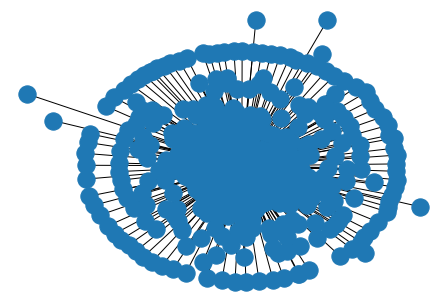

In [405]:
nx.draw(part_1_dict['15'])

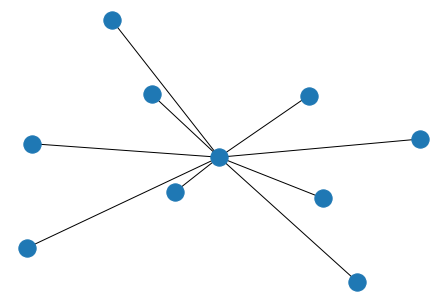

In [406]:
nx.draw(part_1_dict['20'])

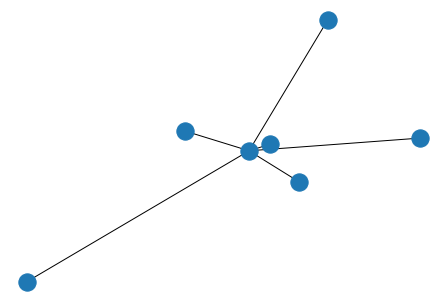

In [407]:
nx.draw(part_1_dict['49'])

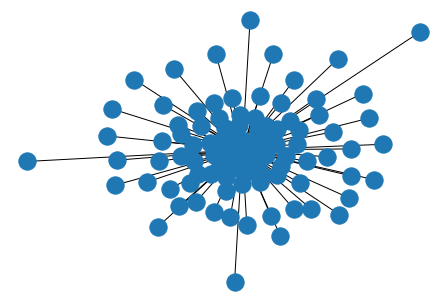

In [408]:
nx.draw(part_1_dict['13'])

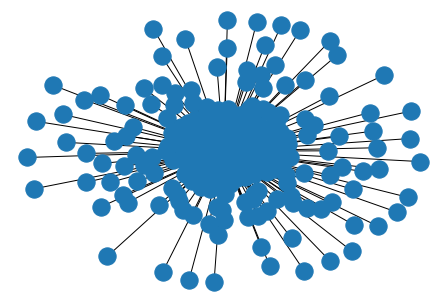

In [409]:
nx.draw(part_1_dict['25'])

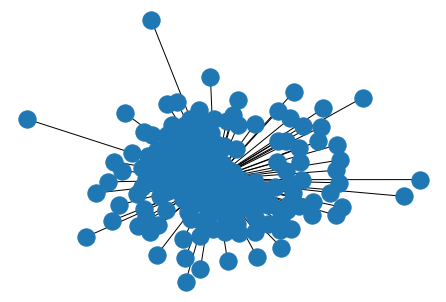

In [410]:
nx.draw(part_1_dict['32'])

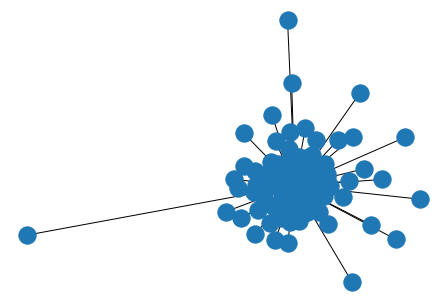

In [411]:
nx.draw(part_1_dict['37'])

# Temp Work - Network analysis


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

**Creation**

In [ ]:
g = nx.Graph()

In [ ]:
g.add_node('A')
g.add_node('B')
g.add_nodes_from(['C','D','E'])
g.add_edge('A','B')
g.add_edge('B','C')
g.add_edge('C','D')
g.add_edge('D','E')
g.add_edge('E','A')
g.add_edges_from([('D','A'),('C','A'),('D','B'),('C','E')])

In [ ]:
g.nodes(),g.edges(),nx.info(g)

**Plotting**

In [ ]:
nx.draw(g,with_labels=True)

In [ ]:
nx.draw_networkx(g)

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(g)
plt.show()

In [ ]:
nx.spring_layout(g)
nx.draw_networkx(g)

**Analysis**

In [ ]:
nx.degree(g,'A'),nx.degree(g,'C'),nx.degree(g,'E') #Nodes connected to

In [ ]:
nx.shortest_path(g,'A','E'), nx.shortest_path(g,'A','C') #shortest distance

In [ ]:
nx.degree_centrality(g)

In [ ]:
nx.eigenvector_centrality(g)

In [ ]:
nx.betweenness_centrality(g)

In [ ]:
nx.average_clustering(g)

**TARGET - WORK**

1. ) nodes  - target_name , cid 
interrelation - ki,kd,ic50 ( less > closer the nodes)

  2.) user gives a cid , we form a network of related compounds 
  
  We do it , by a) download the structure-similar compounds
  b) We'll compare with the network (closely linked checking - )